# <center>A Deep Learning Approach to Automobile Insurance Fraud Detection using CNN-LSTM Hybrid Model<center/>
    
Fraud is one of the largest and most well-known problems that insurers face. The risk of incurring financial losses from fraudulent claims is an issue concerning all insurance companies. </br>

This research project aims to design a predictive model to detect automobile insurance fraud using a hybrid CNN-LSTM Deep Learning Model. </br>By combining LSTM with strong memory ability and the CNN with strong feature expression, we can fully exploit the data for Automobile Insurance Fraud Detection

# 1.  Data Clean up & Processing
The dataset is from Kaggle: https://www.kaggle.com/datasets/shivamb/vehicle-claim-fraud-detection </br>

The dataset consist of 33 columns, having 32 data features and a target feature which indicates whether a claim is fraudulent or legitimate.

### Importing required Libraries

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Activation, Dropout, LSTM, GRU
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score, accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [63]:
data = pd.read_csv("fraud_oracle.csv")
data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [64]:
print(data.shape)
print("The Dataset is made up of "+str(data.shape[0])+" rows")
print("The Dataset is made up of "+str(data.shape[1])+" columns")

(15420, 33)
The Dataset is made up of 15420 rows
The Dataset is made up of 33 columns


### Checking for Null/NA values
We find that there are none in this dataset

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [66]:
data.isna().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [67]:
data.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

### Exploring the values of each columns

In [68]:
All_features = data.columns
for ft in All_features:
    print(ft,data[ft].unique())

Month ['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Nov' 'Apr' 'Mar' 'Aug' 'Jul' 'May' 'Sep']
WeekOfMonth [5 3 2 4 1]
DayOfWeek ['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday']
Make ['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus']
AccidentArea ['Urban' 'Rural']
DayOfWeekClaimed ['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday'
 '0']
MonthClaimed ['Jan' 'Nov' 'Jul' 'Feb' 'Mar' 'Dec' 'Apr' 'Aug' 'May' 'Jun' 'Sep' 'Oct'
 '0']
WeekOfMonthClaimed [1 4 2 3 5]
Sex ['Female' 'Male']
MaritalStatus ['Single' 'Married' 'Widow' 'Divorced']
Age [21 34 47 65 27 20 36  0 30 42 71 52 28 61 38 41 32 40 63 31 45 60 39 55
 35 44 72 29 37 59 49 50 26 48 64 33 74 23 25 56 16 68 18 51 22 53 46 43
 57 54 69 67 19 78 77 75 80 58 73 24 76 62 79 70 17 66]
Fault ['Policy Holder' 'Third Party']
PolicyType ['Sport - Liability' 'Sport - Collision' 'Sedan - Liability'


<b>We find that</b> 
- Age variable has some instances with 0 values
- MonthClaimed also has instances with 0 values

In [69]:
print("Number of 0 values (Age): ",len(data[data["Age"] ==0]))
print("Number of 0 values (MonthClaimed): ",len(data[data["MonthClaimed"] =='0']))
print("Number of 0 values (DayOfWeekClaimed): ",len(data[data["DayOfWeekClaimed"] =='0']))

Number of 0 values (Age):  320
Number of 0 values (MonthClaimed):  1
Number of 0 values (DayOfWeekClaimed):  1


To address the missing values, 
- The Age will be populated with the Max age of Policy holder</br>
- The missing values for MonthClaimed will be populated with the Mode MonthClaimed

In [70]:
data["Age"].unique()

array([21, 34, 47, 65, 27, 20, 36,  0, 30, 42, 71, 52, 28, 61, 38, 41, 32,
       40, 63, 31, 45, 60, 39, 55, 35, 44, 72, 29, 37, 59, 49, 50, 26, 48,
       64, 33, 74, 23, 25, 56, 16, 68, 18, 51, 22, 53, 46, 43, 57, 54, 69,
       67, 19, 78, 77, 75, 80, 58, 73, 24, 76, 62, 79, 70, 17, 66])

In [71]:
data[data["Age"] ==0]["AgeOfPolicyHolder"].value_counts()
#All missing values are the "16 to 17" category of AgeOfPolicyHolder. There max is 7

16 to 17    320
Name: AgeOfPolicyHolder, dtype: int64

In [72]:
data.loc[(data["Age"] == 0),"Age"] = 17 #Jan is the mode
data["Age"].unique()

array([21, 34, 47, 65, 27, 20, 36, 17, 30, 42, 71, 52, 28, 61, 38, 41, 32,
       40, 63, 31, 45, 60, 39, 55, 35, 44, 72, 29, 37, 59, 49, 50, 26, 48,
       64, 33, 74, 23, 25, 56, 16, 68, 18, 51, 22, 53, 46, 43, 57, 54, 69,
       67, 19, 78, 77, 75, 80, 58, 73, 24, 76, 62, 79, 70, 66])

In [73]:
data["MonthClaimed"].value_counts()

Jan    1446
May    1411
Mar    1348
Oct    1339
Jun    1293
Feb    1287
Nov    1285
Apr    1271
Sep    1242
Jul    1225
Dec    1146
Aug    1126
0         1
Name: MonthClaimed, dtype: int64

In [74]:
data.loc[(data["MonthClaimed"] == '0'),"MonthClaimed"] = "Jan" #Jan is the mode
data["MonthClaimed"].value_counts()

Jan    1447
May    1411
Mar    1348
Oct    1339
Jun    1293
Feb    1287
Nov    1285
Apr    1271
Sep    1242
Jul    1225
Dec    1146
Aug    1126
Name: MonthClaimed, dtype: int64

In [75]:
data["DayOfWeekClaimed"].value_counts()

Monday       3757
Tuesday      3375
Wednesday    2951
Thursday     2660
Friday       2497
Saturday      127
Sunday         52
0               1
Name: DayOfWeekClaimed, dtype: int64

In [76]:
data.loc[(data["DayOfWeekClaimed"] == '0'),"DayOfWeekClaimed"] = "Monday" #Jan is the mode
data["DayOfWeekClaimed"].value_counts()

Monday       3758
Tuesday      3375
Wednesday    2951
Thursday     2660
Friday       2497
Saturday      127
Sunday         52
Name: DayOfWeekClaimed, dtype: int64

### Convert to Categoral Data
The columns are converted to float for the modelling

In [77]:
Insurance_Data = data.copy()

In [78]:
Insurance_Data.dtypes

Month                   object
WeekOfMonth              int64
DayOfWeek               object
Make                    object
AccidentArea            object
DayOfWeekClaimed        object
MonthClaimed            object
WeekOfMonthClaimed       int64
Sex                     object
MaritalStatus           object
Age                      int64
Fault                   object
PolicyType              object
VehicleCategory         object
VehiclePrice            object
FraudFound_P             int64
PolicyNumber             int64
RepNumber                int64
Deductible               int64
DriverRating             int64
Days_Policy_Accident    object
Days_Policy_Claim       object
PastNumberOfClaims      object
AgeOfVehicle            object
AgeOfPolicyHolder       object
PoliceReportFiled       object
WitnessPresent          object
AgentType               object
NumberOfSuppliments     object
AddressChange_Claim     object
NumberOfCars            object
Year                     int64
BasePoli

In [79]:
Insurance_Data["DayOfWeek"] = Insurance_Data["DayOfWeek"].astype('category').cat.codes
Insurance_Data["Make"] = Insurance_Data["Make"].astype('category').cat.codes
Insurance_Data["AccidentArea"] = Insurance_Data["AccidentArea"].astype('category').cat.codes
Insurance_Data["DayOfWeekClaimed"] = Insurance_Data["DayOfWeekClaimed"].astype('category').cat.codes
Insurance_Data["MonthClaimed"] = Insurance_Data["MonthClaimed"].astype('category').cat.codes
Insurance_Data["Sex"] = Insurance_Data["Sex"].astype('category').cat.codes
Insurance_Data["MaritalStatus"] = Insurance_Data["MaritalStatus"].astype('category').cat.codes
Insurance_Data["Fault"] = Insurance_Data["Fault"].astype('category').cat.codes
Insurance_Data["PolicyType"] = Insurance_Data["PolicyType"].astype('category').cat.codes
Insurance_Data["VehiclePrice"] = Insurance_Data["VehiclePrice"].astype('category').cat.codes
Insurance_Data["Days_Policy_Accident"] = Insurance_Data["Days_Policy_Accident"].astype('category').cat.codes
Insurance_Data["Days_Policy_Claim"] = Insurance_Data["Days_Policy_Claim"].astype('category').cat.codes
Insurance_Data["PastNumberOfClaims"] = Insurance_Data["PastNumberOfClaims"].astype('category').cat.codes
Insurance_Data["AgeOfVehicle"] = Insurance_Data["AgeOfVehicle"].astype('category').cat.codes
Insurance_Data["PoliceReportFiled"] = Insurance_Data["PoliceReportFiled"].astype('category').cat.codes
Insurance_Data["WitnessPresent"] = Insurance_Data["WitnessPresent"].astype('category').cat.codes
Insurance_Data["AgentType"] = Insurance_Data["AgentType"].astype('category').cat.codes
Insurance_Data["NumberOfSuppliments"] = Insurance_Data["NumberOfSuppliments"].astype('category').cat.codes
Insurance_Data["NumberOfCars"] = Insurance_Data["NumberOfCars"].astype('category').cat.codes
Insurance_Data["Month"] = Insurance_Data["Month"].astype('category').cat.codes
Insurance_Data["VehicleCategory"] = Insurance_Data["VehicleCategory"].astype('category').cat.codes
Insurance_Data["AgeOfPolicyHolder"] = Insurance_Data["AgeOfPolicyHolder"].astype('category').cat.codes
Insurance_Data["AddressChange_Claim"] = Insurance_Data["AddressChange_Claim"].astype('category').cat.codes
Insurance_Data["BasePolicy"] = Insurance_Data["BasePolicy"].astype('category').cat.codes

In [80]:
Insurance_Data.dtypes

Month                    int8
WeekOfMonth             int64
DayOfWeek                int8
Make                     int8
AccidentArea             int8
DayOfWeekClaimed         int8
MonthClaimed             int8
WeekOfMonthClaimed      int64
Sex                      int8
MaritalStatus            int8
Age                     int64
Fault                    int8
PolicyType               int8
VehicleCategory          int8
VehiclePrice             int8
FraudFound_P            int64
PolicyNumber            int64
RepNumber               int64
Deductible              int64
DriverRating            int64
Days_Policy_Accident     int8
Days_Policy_Claim        int8
PastNumberOfClaims       int8
AgeOfVehicle             int8
AgeOfPolicyHolder        int8
PoliceReportFiled        int8
WitnessPresent           int8
AgentType                int8
NumberOfSuppliments      int8
AddressChange_Claim      int8
NumberOfCars             int8
Year                    int64
BasePolicy               int8
dtype: obj

### Splitting the Feature and the Target Variables

In [81]:
Features = Insurance_Data.copy()
Features = Features.drop(["PolicyNumber","FraudFound_P"],axis=1)
Target = Insurance_Data["FraudFound_P"]

Features.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,2,5,6,6,1,5,4,1,0,2,...,1,3,0,0,0,3,0,2,1994,2
1,4,3,6,6,1,1,4,4,1,2,...,4,4,1,0,0,3,3,0,1994,1
2,10,5,0,6,1,4,9,2,1,1,...,5,6,0,0,0,3,3,0,1994,1
3,6,2,2,17,0,0,5,1,1,1,...,6,7,1,0,0,2,3,0,1994,2
4,4,5,1,6,1,5,3,2,0,2,...,3,4,0,0,0,3,3,0,1994,1


### Checking for Multicollinearity

Multicollinearity of the features is examines using Variance Inflator Factor (VIF) and Correlation heatmap</br>

If the proportion of cases in the reference category is small, the indicator variables will necessarily have high VIFs, even if the categorical variable is not associated with other variables in the model. </br>

If the feature correlation is high and the VIF is more than 7, then the feature is removed

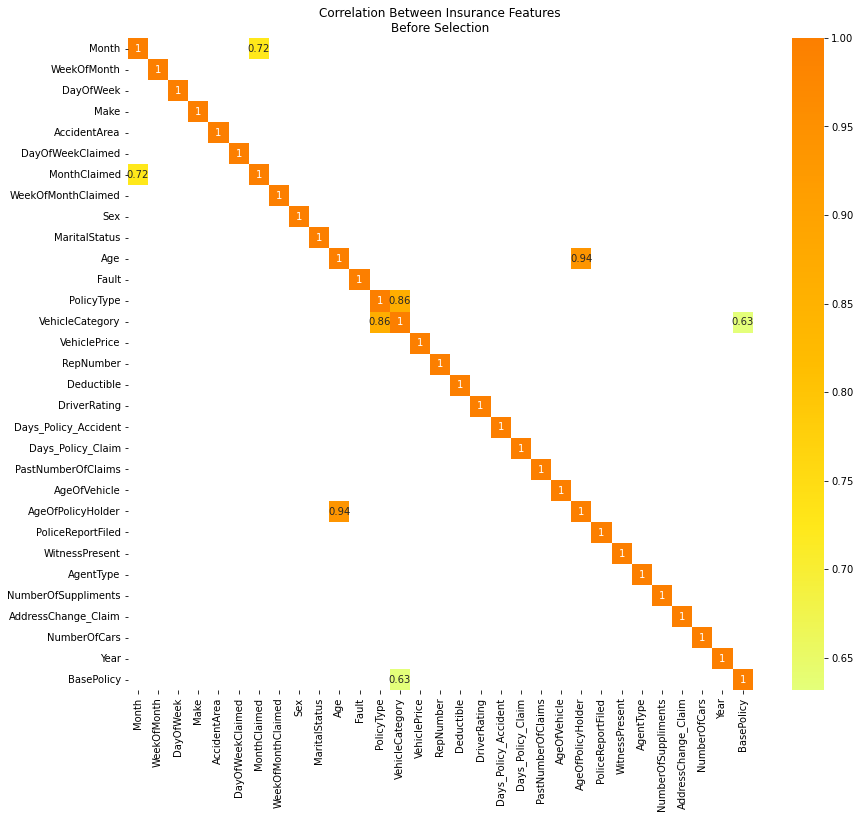

In [82]:
# plotting correlation heatmap
corr = Features.corr()
kot = corr[(corr>= 0.6) | (corr <= -0.6)]
plt.figure(figsize = (14,12))   
dataplot=sns.heatmap(kot,cmap="Wistia", annot=True)
plt.title('Correlation Between Insurance Features\nBefore Selection')
plt.show()

In [83]:
# VIF dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
def getVIF(Features):    
    vif_data = pd.DataFrame()
    vif_data["Feature"] = Features.columns

    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(Features.values, i)
                              for i in range(len(Features.columns))]
    
    return vif_data
  
print(getVIF(Features))

                 Feature         VIF
0                  Month    7.665287
1            WeekOfMonth    6.176101
2              DayOfWeek    3.048802
3                   Make    4.889849
4           AccidentArea    9.713947
5       DayOfWeekClaimed    3.025614
6           MonthClaimed    7.789969
7     WeekOfMonthClaimed    6.058211
8                    Sex    6.769220
9          MaritalStatus   11.129343
10                   Age  114.768926
11                 Fault    1.450719
12            PolicyType    8.834151
13       VehicleCategory    7.665235
14          VehiclePrice    1.982901
15             RepNumber    4.409210
16            Deductible   90.371169
17          DriverRating    5.952986
18  Days_Policy_Accident  379.100186
19     Days_Policy_Claim  296.329243
20    PastNumberOfClaims    2.713065
21          AgeOfVehicle   28.541702
22     AgeOfPolicyHolder  132.113413
23     PoliceReportFiled    1.076078
24        WitnessPresent    1.053568
25             AgentType    1.026784
2

In [84]:
Features = Features.drop("VehicleCategory",axis=1)
Features = Features.drop("AgeOfPolicyHolder",axis=1)
Features = Features.drop("Month",axis=1)
print(getVIF(Features))

                 Feature         VIF
0            WeekOfMonth    6.174669
1              DayOfWeek    3.048104
2                   Make    4.872274
3           AccidentArea    9.698670
4       DayOfWeekClaimed    3.023978
5           MonthClaimed    3.711310
6     WeekOfMonthClaimed    6.053150
7                    Sex    6.759083
8          MaritalStatus   10.635982
9                    Age   16.948070
10                 Fault    1.447258
11            PolicyType    3.465325
12          VehiclePrice    1.881556
13             RepNumber    4.408557
14            Deductible   90.203049
15          DriverRating    5.952183
16  Days_Policy_Accident  379.009344
17     Days_Policy_Claim  296.188626
18    PastNumberOfClaims    2.713038
19          AgeOfVehicle   27.464339
20     PoliceReportFiled    1.075193
21        WitnessPresent    1.053290
22             AgentType    1.025626
23   NumberOfSuppliments    4.305800
24   AddressChange_Claim   47.125559
25          NumberOfCars    1.168333
2

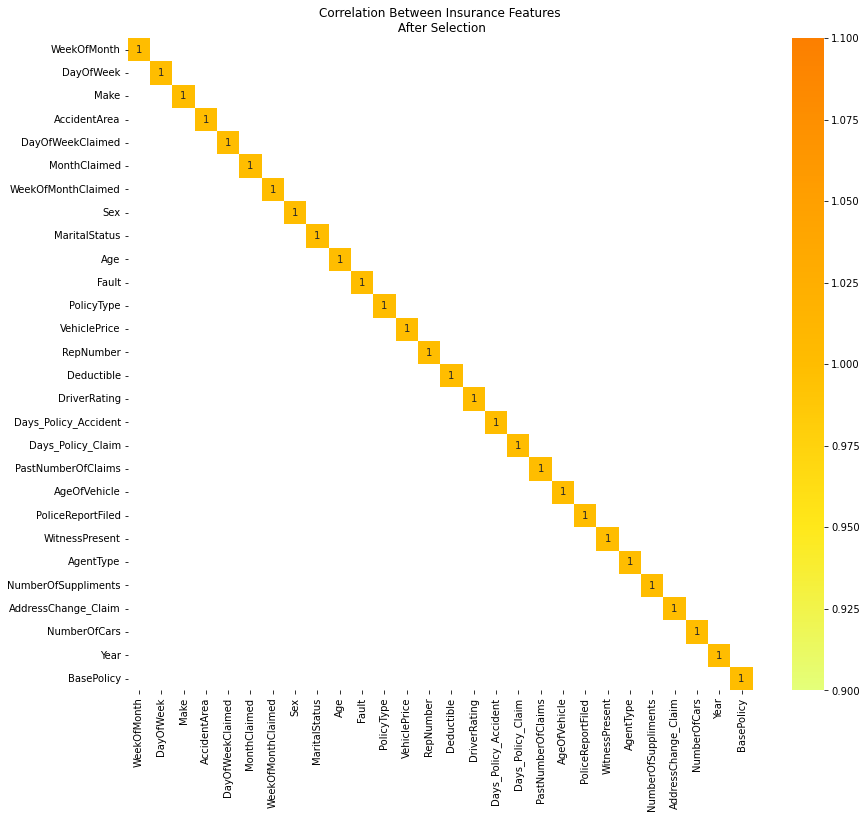

In [24]:
corr = Features.corr()
kot = corr[(corr>= 0.6) | (corr <= -0.6)]
plt.figure(figsize = (14,12))   
dataplot=sns.heatmap(kot,cmap="Wistia", annot=True)
plt.title('Correlation Between Insurance Features\n After Selection')
plt.show()

# 2. Deep Learning + ML Modelling

## Distribution of the classes
The Dataset is highly unbalanced. <b>Only 6%</b> of the cases are classified as fraudulent</br>
Therefore, we will need some balance the data during the modelling </br>


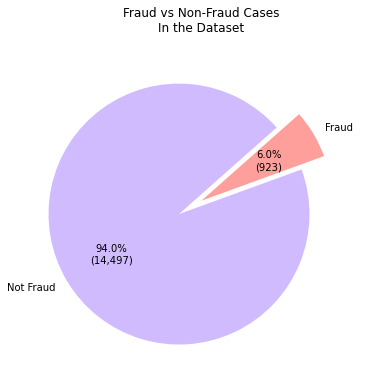

In [25]:
import seaborn as sns

true_count = data[data['FraudFound_P'] == 1].shape[0]
false_count = data[data['FraudFound_P'] == 0].shape[0]

total = data.shape[0]
input_data = [true_count, false_count]
labels = ['Fraud', 'Not Fraud']

explode = [0,0.2]

#define Seaborn color palette to use
plt.figure(figsize = (8, 6))
colors = sns.color_palette('pastel')[3:5]

#create pie chart
plt.pie(input_data, labels = labels, 
        colors = colors, 
        autopct=lambda x: '{:.1f}%\n({})'.format(x, format(int((total*x/100).round(0)),",")),
        startangle = 20,explode =explode)

plt.title("Fraud vs Non-Fraud Cases\nIn the Dataset")
plt.show()

2 Techniques will be used
  - Synthetic Minority Oversampling Technique (SMOTE)
  - Random Sampling of 500 samples in each class for 50:50 ratio

## a. Modelling using SMOTE

In [26]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where

X = Features.values.astype(float)
y = np.array(Target)

counter = Counter(y)
print("Distribution Before SMOTE")
print(counter)

# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

# summarize the new class distribution
print("\nDistribution After SMOTE")
counter = Counter(y)
print(counter)

Distribution Before SMOTE
Counter({0: 14497, 1: 923})

Distribution After SMOTE
Counter({0: 14497, 1: 14497})


### Spliting and Normalizing the Data

In [27]:
y = to_categorical(y) # First convert y to one hot encoding
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

def data_normalization(train_df, test_df):
    scaler = MinMaxScaler()
    # fitting the scaler to training data
    scaler = scaler.fit(train_df)
    # Transforming training and test data using scaler
    train_df = scaler.transform(train_df)
    test_df = scaler.transform(test_df)
    return train_df, test_df

# Applying normalization to data
X_train, X_test = data_normalization(X_train, X_test)

### Reshape X for modelling

In [28]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [29]:
print("The train and test sizes for X and y are below")
X_train.shape,X_test.shape,y_train.shape,y_test.shape

The train and test sizes for X and y are below


((20295, 28, 1), (8699, 28, 1), (20295, 2), (8699, 2))

### CNN-LSTM Hybrid Model

In [85]:
def cnn_lstm():
    cnn_lstm = tf.keras.models.Sequential()
    cnn_lstm.add(layers.Conv1D(filters=128, 
                     kernel_size=3, 
                     input_shape=(X_train.shape[1],X_train.shape[2])))
    cnn_lstm.add(layers.MaxPooling1D((2)))

    cnn_lstm.add(layers.Conv1D(filters=64, 
                     kernel_size=3))
    cnn_lstm.add(layers.MaxPooling1D((2)))


    cnn_lstm.add(LSTM(32, activation='relu', input_shape=(X_train.shape[1],X_train.shape[2]),
                     kernel_regularizer=regularizers.l2(0.001)))
    cnn_lstm.add(Dense(16, activation='relu'))
    cnn_lstm.add(Dense(2, activation='sigmoid'))
    cnn_lstm.summary()
    
    return cnn_lstm

In [31]:
#from keras.utils import plot_model
#plot_model(cnn)

### Compile and fit the model on the train set

In [32]:
cnn_lstm_model = cnn_lstm()
cnn_lstm_model.compile(optimizer='adam', 
                  loss='binary_crossentropy',
                  metrics=['acc'])

history1 = cnn_lstm_model.fit(X_train, 
                         y_train, 
                         epochs=200, 
                         batch_size=128, 
                         validation_split=0.2, 
                         verbose=1)

2022-04-28 00:58:05.070151: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-28 00:58:05.070429: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 4. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 26, 128)           512       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 13, 128)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 11, 64)            24640     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 5, 64)             0         
_________________________________________________________________
lstm (LSTM)                  (None, 32)                12416     
_________________________________________________________________
dense (Dense)                (None, 16)                528       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 3

16236/16236 [==============================] - 8s 488us/sample - loss: 0.2295 - acc: 0.9098 - val_loss: 0.3029 - val_acc: 0.8724
Epoch 50/200
16236/16236 [==============================] - 9s 568us/sample - loss: 0.2350 - acc: 0.9076 - val_loss: 0.2624 - val_acc: 0.8959
Epoch 51/200
16236/16236 [==============================] - 10s 622us/sample - loss: 0.2321 - acc: 0.9090 - val_loss: 0.3058 - val_acc: 0.8719
Epoch 52/200
16236/16236 [==============================] - 9s 573us/sample - loss: 0.2197 - acc: 0.9162 - val_loss: 0.2534 - val_acc: 0.8964
Epoch 53/200
16236/16236 [==============================] - 9s 576us/sample - loss: 0.2231 - acc: 0.9124 - val_loss: 0.3124 - val_acc: 0.8783
Epoch 54/200
16236/16236 [==============================] - 11s 682us/sample - loss: 0.2282 - acc: 0.9094 - val_loss: 0.2579 - val_acc: 0.8948
Epoch 55/200
16236/16236 [==============================] - 11s 656us/sample - loss: 0.2186 - acc: 0.9162 - val_loss: 0.2852 - val_acc: 0.8829
Epoch 56/200
162

16236/16236 [==============================] - 17s 1ms/sample - loss: 0.1434 - acc: 0.9508 - val_loss: 0.2549 - val_acc: 0.9146
Epoch 107/200
16236/16236 [==============================] - 10s 596us/sample - loss: 0.1466 - acc: 0.9503 - val_loss: 0.2613 - val_acc: 0.9086
Epoch 108/200
16236/16236 [==============================] - 10s 588us/sample - loss: 0.1501 - acc: 0.9504 - val_loss: 0.2513 - val_acc: 0.9178
Epoch 109/200
16236/16236 [==============================] - 17s 1ms/sample - loss: 0.1390 - acc: 0.9551 - val_loss: 0.2986 - val_acc: 0.8980
Epoch 110/200
16236/16236 [==============================] - 18s 1ms/sample - loss: 0.1431 - acc: 0.9527 - val_loss: 0.2382 - val_acc: 0.9193
Epoch 111/200
16236/16236 [==============================] - 10s 638us/sample - loss: 0.1460 - acc: 0.9515 - val_loss: 0.2329 - val_acc: 0.9207
Epoch 112/200
16236/16236 [==============================] - 10s 598us/sample - loss: 0.1416 - acc: 0.9539 - val_loss: 0.2562 - val_acc: 0.9145
Epoch 113/20

16236/16236 [==============================] - 11s 679us/sample - loss: 0.1070 - acc: 0.9680 - val_loss: 0.2748 - val_acc: 0.9193
Epoch 164/200
16236/16236 [==============================] - 10s 598us/sample - loss: 0.1052 - acc: 0.9690 - val_loss: 0.2810 - val_acc: 0.9201
Epoch 165/200
16236/16236 [==============================] - 10s 596us/sample - loss: 0.1139 - acc: 0.9667 - val_loss: 0.2650 - val_acc: 0.9214
Epoch 166/200
16236/16236 [==============================] - 15s 899us/sample - loss: 0.0942 - acc: 0.9751 - val_loss: 0.2678 - val_acc: 0.9235
Epoch 167/200
16236/16236 [==============================] - 16s 992us/sample - loss: 0.1065 - acc: 0.9686 - val_loss: 0.3048 - val_acc: 0.9135
Epoch 168/200
16236/16236 [==============================] - 9s 585us/sample - loss: 0.0952 - acc: 0.9746 - val_loss: 0.2706 - val_acc: 0.9304
Epoch 169/200
16236/16236 [==============================] - 9s 584us/sample - loss: 0.0914 - acc: 0.9754 - val_loss: 0.2803 - val_acc: 0.9254
Epoch 17

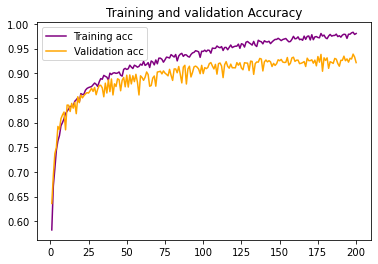

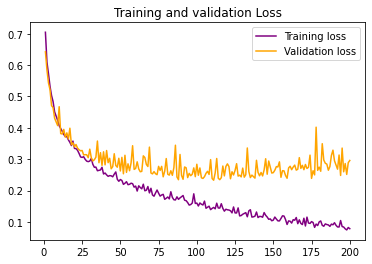

In [33]:
acc = history1.history['acc']
val_acc = history1.history['val_acc']
 
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(1, 201)
 
plt.figure()
 
plt.plot(epochs, acc, 'purple', label='Training acc')
plt.plot(epochs, val_acc,'orange', label='Validation acc')
plt.title('Training and validation Accuracy')
plt.legend()
plt.show()


plt.plot(epochs, loss,'purple', label='Training loss')
plt.plot(epochs, val_loss,'orange', label='Validation loss')
plt.title('Training and validation Loss')
plt.legend()
plt.show()

In [34]:
best_epoch_model = np.argmin(history1.history['val_loss'])
print("best epoch:%s \nvalidation loss:%.3f \nvalidation acc:%.3f"%(best_epoch_model, 
                                                                 history1.history['val_loss'][best_epoch_model], 
                                                                 history1.history['val_acc'][best_epoch_model]))

best epoch:110 
validation loss:0.233 
validation acc:0.921


### Re-train the model using the number of epochs identified above, and test the performance over the test set. Report the accuracy value.

In [35]:
cnn_lstm_model = cnn_lstm()

cnn_lstm_model.compile(optimizer='adam', 
                  loss='binary_crossentropy',
                  metrics=['acc'])
history1 = cnn_lstm_model.fit(X_train, 
                   y_train, 
                   epochs=best_epoch_model, 
                   batch_size=128, 
                   validation_split=0.2, 
                   verbose=1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 26, 128)           512       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 13, 128)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 11, 64)            24640     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 5, 64)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                

16236/16236 [==============================] - 12s 758us/sample - loss: 0.2213 - acc: 0.9133 - val_loss: 0.2682 - val_acc: 0.8927
Epoch 50/110
16236/16236 [==============================] - 15s 924us/sample - loss: 0.2176 - acc: 0.9147 - val_loss: 0.3088 - val_acc: 0.8726
Epoch 51/110
16236/16236 [==============================] - 11s 659us/sample - loss: 0.2275 - acc: 0.9100 - val_loss: 0.2737 - val_acc: 0.8936
Epoch 52/110
16236/16236 [==============================] - 11s 666us/sample - loss: 0.2136 - acc: 0.9144 - val_loss: 0.2622 - val_acc: 0.8979
Epoch 53/110
16236/16236 [==============================] - 12s 735us/sample - loss: 0.2173 - acc: 0.9154 - val_loss: 0.2584 - val_acc: 0.8978
Epoch 54/110
16236/16236 [==============================] - 12s 729us/sample - loss: 0.2111 - acc: 0.9190 - val_loss: 0.2851 - val_acc: 0.8869
Epoch 55/110
16236/16236 [==============================] - 12s 723us/sample - loss: 0.2044 - acc: 0.9220 - val_loss: 0.2538 - val_acc: 0.8979
Epoch 56/110

16236/16236 [==============================] - 9s 573us/sample - loss: 0.1371 - acc: 0.9524 - val_loss: 0.2315 - val_acc: 0.9267
Epoch 107/110
16236/16236 [==============================] - 14s 870us/sample - loss: 0.1316 - acc: 0.9560 - val_loss: 0.2793 - val_acc: 0.9076
Epoch 108/110
16236/16236 [==============================] - 14s 880us/sample - loss: 0.1443 - acc: 0.9505 - val_loss: 0.2440 - val_acc: 0.9160
Epoch 109/110
16236/16236 [==============================] - 12s 729us/sample - loss: 0.1461 - acc: 0.9501 - val_loss: 0.3828 - val_acc: 0.8736
Epoch 110/110
16236/16236 [==============================] - 11s 677us/sample - loss: 0.1385 - acc: 0.9537 - val_loss: 0.2357 - val_acc: 0.9198


### Evaluating the Model

In [37]:
loss, acc_train = cnn_lstm_model.evaluate(X_train ,y_train,verbose=0)
loss, acc_test = cnn_lstm_model.evaluate(X_test ,y_test,verbose=0)
print("Accuracy on Train Set: ",acc_train)
print("Accuracy on Test Set: ",acc_test)

Accuracy on Train Set:  0.95567876
Accuracy on Test Set:  0.9109093


In [38]:
pred_train = np.argmax(cnn_lstm_model.predict(X_train), axis= -1)
y_true_train = np.argmax(y_train,axis= -1)

pred_test = np.argmax(cnn_lstm_model.predict(X_test), axis= -1)
y_true_test = np.argmax(y_test,axis= -1)

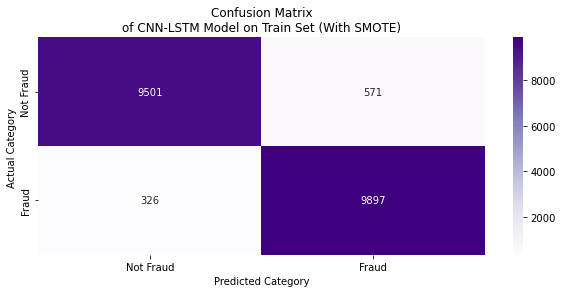

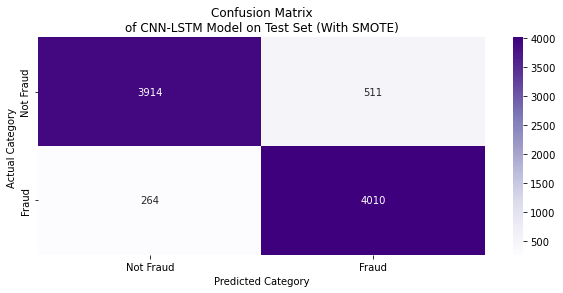

In [39]:
plt.rcParams['figure.figsize'] = [10, 4]
cf_matrix = confusion_matrix(y_true_train,pred_train)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Purples',fmt='g')

ax.set_title('Confusion Matrix\nof CNN-LSTM Model on Train Set (With SMOTE)');
ax.set_ylabel('Actual Category ');
ax.set_xlabel('Predicted Category')

ax.xaxis.set_ticklabels(['Not Fraud','Fraud'])
ax.yaxis.set_ticklabels(['Not Fraud','Fraud'])

plt.show()

print("\n\n")
plt.rcParams['figure.figsize'] = [10, 4]
cf_matrix = confusion_matrix(y_true_test,pred_test)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Purples',fmt='g')

ax.set_title('Confusion Matrix\nof CNN-LSTM Model on Test Set (With SMOTE)');
ax.set_ylabel('Actual Category ');
ax.set_xlabel('Predicted Category')

ax.xaxis.set_ticklabels(['Not Fraud','Fraud'])
ax.yaxis.set_ticklabels(['Not Fraud','Fraud'])

plt.show()

In [40]:
Final_df = pd.DataFrame([])
print("EVALUATION ON TEST SET")
acc = accuracy_score(y_true_test, pred_test)
print("Accuracy: ",acc.round(2))

f1 = f1_score(y_true_test, pred_test)
print("F1 Score: ",f1.round(2))

recall = recall_score(y_true_test, pred_test)
print("Recall: ",recall.round(2))

precision =  precision_score(y_true_test, pred_test)
print("Precision: ",precision.round(2))

print(classification_report(y_true_test, pred_test))

temp_df = pd.DataFrame([])
temp_df["Measure"] = ["Accuracy","Precision","Recall","F1_Score"]
temp_df["Values"] = [acc, f1, recall, precision]
temp_df["Model"] = "CNN-LSTM"
Final_df = pd.concat([Final_df, temp_df])

EVALUATION ON TEST SET
Accuracy:  0.91
F1 Score:  0.91
Recall:  0.94
Precision:  0.89
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      4425
           1       0.89      0.94      0.91      4274

    accuracy                           0.91      8699
   macro avg       0.91      0.91      0.91      8699
weighted avg       0.91      0.91      0.91      8699



## Comparing with Machine Learning Models

In [41]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score


X = Features.values.astype(float)
y = np.array(Target)

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)

models={"XGBoost":XGBClassifier(random_state = 2,use_label_encoder=False,eval_metric="logloss"),
        "Random Forest":RandomForestClassifier(random_state = 2),
        "Logistic Regression":LogisticRegression(random_state=2,solver='lbfgs',max_iter=2000)}


for mod,model_classifier in models.items():

    print("\n\t\t\t\t",mod)
    model = model_classifier
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    
    print(classification_report(y_test, y_pred))

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision =  precision_score(y_test, y_pred)


    temp_df = pd.DataFrame([])
    temp_df["Measure"] = ["Accuracy","Precision","Recall","F1_Score"]
    temp_df["Values"] = [acc, precision, recall, f1]
    temp_df["Model"] = mod
    Final_df = pd.concat([Final_df, temp_df])


				 XGBoost
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      4334
           1       0.99      0.94      0.97      4365

    accuracy                           0.97      8699
   macro avg       0.97      0.97      0.97      8699
weighted avg       0.97      0.97      0.97      8699


				 Random Forest
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      4334
           1       1.00      0.94      0.97      4365

    accuracy                           0.97      8699
   macro avg       0.97      0.97      0.97      8699
weighted avg       0.97      0.97      0.97      8699


				 Logistic Regression
              precision    recall  f1-score   support

           0       0.78      0.69      0.73      4334
           1       0.72      0.81      0.76      4365

    accuracy                           0.75      8699
   macro avg       0.75      0.75      0.75      8699
weighted avg  

In [42]:
print(Final_df)

     Measure    Values                Model
0   Accuracy  0.910909             CNN-LSTM
1  Precision  0.911882             CNN-LSTM
2     Recall  0.938231             CNN-LSTM
3   F1_Score  0.886972             CNN-LSTM
0   Accuracy  0.966778              XGBoost
1  Precision  0.990611              XGBoost
2     Recall  0.942726              XGBoost
3   F1_Score  0.966076              XGBoost
0   Accuracy  0.969882        Random Forest
1  Precision  0.996852        Random Forest
2     Recall  0.942955        Random Forest
3   F1_Score  0.969155        Random Forest
0   Accuracy  0.746063  Logistic Regression
1  Precision  0.720902  Logistic Regression
2     Recall  0.805956  Logistic Regression
3   F1_Score  0.761060  Logistic Regression


### Model Comparison

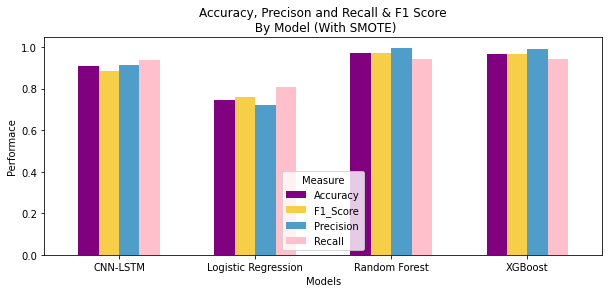

In [43]:
Model_group = Final_df.groupby(["Model","Measure"]).mean()
Model_group = Model_group["Values"]
stack = Model_group.unstack("Measure")
stack.plot.bar(width=0.6,color=["purple","#f7ce48","#4f9dc9","pink"])
plt.title('Accuracy, Precison and Recall & F1 Score\n By Model (With SMOTE)')
plt.ylabel('Performace')
plt.xlabel('Models')
plt.xticks(rotation = 0)
plt.rcParams['figure.figsize'] = [13, 5]
plt.show()

## b. Modelling on randomly selected 1000 samples using 50:50 Fraud to Non-Fraud Ratio

In [86]:
Non_Fraud_Cases = Insurance_Data[Insurance_Data["FraudFound_P"] ==0]
Fraud_Cases = Insurance_Data[Insurance_Data["FraudFound_P"] ==1]

Non_Fraud_Cases = Non_Fraud_Cases.sample(frac=1).reset_index(drop=True)
Fraud_Cases = Fraud_Cases.sample(frac=1).reset_index(drop=True)

X_train_NF = Non_Fraud_Cases.iloc[:500]
X_train_F = Fraud_Cases.iloc[:500]

X_test_NF = Non_Fraud_Cases.iloc[500:]
X_test_F = Fraud_Cases.iloc[500:]

X_train = pd.concat([X_train_NF, X_train_F])
X_test = pd.concat([X_test_NF, X_test_F])

X_train = X_train.sample(frac=1).reset_index(drop=True)
X_test = X_test.sample(frac=1).reset_index(drop=True)

y_train = X_train["FraudFound_P"]
y_test = X_test["FraudFound_P"]


drop_col = ["PolicyNumber","FraudFound_P","VehicleCategory","AgeOfPolicyHolder","Month"]
X_train = X_train.drop(drop_col,axis=1)
X_test = X_test.drop(drop_col,axis=1)


In [87]:
X_train = X_train.values.astype(float)
X_test = X_test.values.astype(float)

y_train = to_categorical(np.array(y_train))
y_test = to_categorical(np.array(y_test))

X_train, X_test = data_normalization(X_train, X_test)
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [88]:
print("The train and test sizes for X and y are below")
X_train.shape,X_test.shape,y_train.shape,y_test.shape

The train and test sizes for X and y are below


((1000, 28, 1), (14420, 28, 1), (1000, 2), (14420, 2))

### Fitting the CNN Model

In [89]:
cnn_lstm_model = cnn_lstm()

cnn_lstm_model.compile(optimizer='adam', 
                  loss='binary_crossentropy',
                  metrics=['acc'])

history1 = cnn_lstm_model.fit(X_train, 
                         y_train, 
                         epochs=200, 
                         batch_size=128, 
                         validation_split=0.2, 
                         verbose=1)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 26, 128)           512       
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 13, 128)           0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 11, 64)            24640     
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 5, 64)             0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_8 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_9 (Dense)              (None, 2)                

Epoch 51/200
800/800 [==============================] - 1s 660us/sample - loss: 0.5018 - acc: 0.7494 - val_loss: 0.6510 - val_acc: 0.6425
Epoch 52/200
800/800 [==============================] - 1s 630us/sample - loss: 0.5163 - acc: 0.7456 - val_loss: 0.6393 - val_acc: 0.6250
Epoch 53/200
800/800 [==============================] - 1s 665us/sample - loss: 0.5205 - acc: 0.7387 - val_loss: 0.6059 - val_acc: 0.6500
Epoch 54/200
800/800 [==============================] - 1s 633us/sample - loss: 0.5007 - acc: 0.7525 - val_loss: 0.5977 - val_acc: 0.6250
Epoch 55/200
800/800 [==============================] - 1s 632us/sample - loss: 0.4911 - acc: 0.7713 - val_loss: 0.6123 - val_acc: 0.6450
Epoch 56/200
800/800 [==============================] - 1s 632us/sample - loss: 0.4805 - acc: 0.7644 - val_loss: 0.7167 - val_acc: 0.6575
Epoch 57/200
800/800 [==============================] - 1s 699us/sample - loss: 0.5291 - acc: 0.7456 - val_loss: 0.6101 - val_acc: 0.6500
Epoch 58/200
800/800 [============

800/800 [==============================] - 0s 625us/sample - loss: 0.2895 - acc: 0.8894 - val_loss: 0.7798 - val_acc: 0.6425
Epoch 111/200
800/800 [==============================] - 1s 688us/sample - loss: 0.2756 - acc: 0.8981 - val_loss: 0.7174 - val_acc: 0.6575
Epoch 112/200
800/800 [==============================] - 1s 635us/sample - loss: 0.2680 - acc: 0.9062 - val_loss: 0.8757 - val_acc: 0.6425
Epoch 113/200
800/800 [==============================] - 1s 669us/sample - loss: 0.3125 - acc: 0.8719 - val_loss: 0.8463 - val_acc: 0.6400
Epoch 114/200
800/800 [==============================] - 0s 616us/sample - loss: 0.2779 - acc: 0.9019 - val_loss: 0.8793 - val_acc: 0.6475
Epoch 115/200
800/800 [==============================] - 1s 653us/sample - loss: 0.2649 - acc: 0.9056 - val_loss: 0.9183 - val_acc: 0.6450
Epoch 116/200
800/800 [==============================] - 1s 680us/sample - loss: 0.2895 - acc: 0.8831 - val_loss: 0.7888 - val_acc: 0.6300
Epoch 117/200
800/800 [==================

800/800 [==============================] - 1s 678us/sample - loss: 0.1116 - acc: 0.9756 - val_loss: 1.3825 - val_acc: 0.6150
Epoch 170/200
800/800 [==============================] - 1s 649us/sample - loss: 0.1014 - acc: 0.9812 - val_loss: 1.4943 - val_acc: 0.6075
Epoch 171/200
800/800 [==============================] - 1s 631us/sample - loss: 0.1066 - acc: 0.9825 - val_loss: 1.4914 - val_acc: 0.6275
Epoch 172/200
800/800 [==============================] - 1s 664us/sample - loss: 0.0993 - acc: 0.9756 - val_loss: 1.5661 - val_acc: 0.6225
Epoch 173/200
800/800 [==============================] - 1s 646us/sample - loss: 0.0980 - acc: 0.9806 - val_loss: 1.6965 - val_acc: 0.6450
Epoch 174/200
800/800 [==============================] - 0s 611us/sample - loss: 0.1063 - acc: 0.9681 - val_loss: 1.6664 - val_acc: 0.6400
Epoch 175/200
800/800 [==============================] - 0s 624us/sample - loss: 0.0874 - acc: 0.9906 - val_loss: 1.7011 - val_acc: 0.6350
Epoch 176/200
800/800 [==================

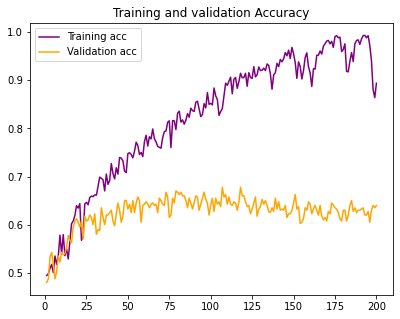

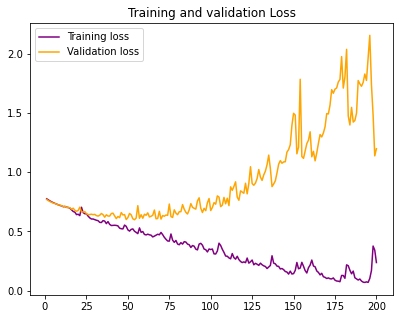

In [91]:
plt.rcParams['figure.figsize'] = [6.5, 5]
acc = history1.history['acc']
val_acc = history1.history['val_acc']
 
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(1, 201)
 
plt.figure()
 
plt.plot(epochs, acc, 'purple', label='Training acc')
plt.plot(epochs, val_acc,'orange', label='Validation acc')
plt.title('Training and validation Accuracy')
plt.legend()
plt.show()


plt.plot(epochs, loss,'purple', label='Training loss')
plt.plot(epochs, val_loss,'orange', label='Validation loss')
plt.title('Training and validation Loss')
plt.legend()
plt.show()

In [92]:
best_epoch_model = np.argmin(history1.history['val_loss'])
print("best epoch:%s \nvalidation loss:%.3f \nvalidation acc:%.3f"%(best_epoch_model, 
                                                                 history1.history['val_loss'][best_epoch_model], 
                                                                 history1.history['val_acc'][best_epoch_model]))

best epoch:53 
validation loss:0.598 
validation acc:0.625


### Re-train the model using the number of epochs identified above, and test the performance over the test set. Report the accuracy value.

In [93]:
cnn_lstm_model = cnn_lstm()

cnn_lstm_model.compile(optimizer='adam', 
                  loss='binary_crossentropy',
                  metrics=['acc'])

history1 = cnn_lstm_model.fit(X_train, 
                         y_train, 
                         epochs=best_epoch_model, 
                         batch_size=128, 
                         validation_split=0.2, 
                         verbose=1)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_10 (Conv1D)           (None, 26, 128)           512       
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 13, 128)           0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 11, 64)            24640     
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 5, 64)             0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_10 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_11 (Dense)             (None, 2)                

800/800 [==============================] - 1s 1ms/sample - loss: 0.5433 - acc: 0.7294 - val_loss: 0.6035 - val_acc: 0.6275
Epoch 52/53
800/800 [==============================] - 1s 890us/sample - loss: 0.5333 - acc: 0.7206 - val_loss: 0.6251 - val_acc: 0.6575
Epoch 53/53
800/800 [==============================] - 1s 855us/sample - loss: 0.5305 - acc: 0.7287 - val_loss: 0.6365 - val_acc: 0.6625


### Evaluating the Model

In [94]:
loss, acc_train = cnn_lstm_model.evaluate(X_train ,y_train,verbose=0)
loss, acc_test = cnn_lstm_model.evaluate(X_test ,y_test,verbose=0)
print("Accuracy on Train Set: ",acc_train)
print("Accuracy on Test Set: ",acc_test)

Accuracy on Train Set:  0.7235
Accuracy on Test Set:  0.5066921


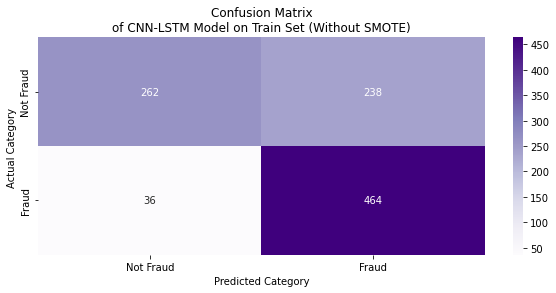

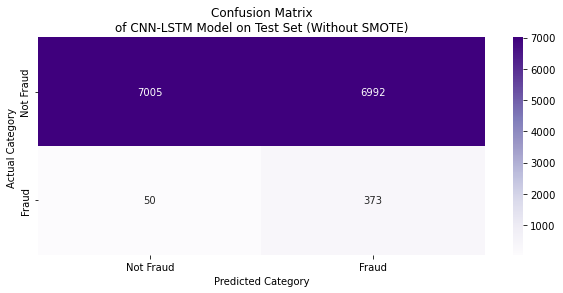

In [52]:
pred_train = np.argmax(cnn_lstm_model.predict(X_train), axis= -1)
y_true_train = np.argmax(y_train,axis= -1)

pred_test = np.argmax(cnn_lstm_model.predict(X_test), axis= -1)
y_true_test = np.argmax(y_test,axis= -1)


plt.rcParams['figure.figsize'] = [10, 4]
cf_matrix = confusion_matrix(y_true_train,pred_train)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Purples',fmt='g')

ax.set_title('Confusion Matrix\nof CNN-LSTM Model on Train Set (Without SMOTE)');
ax.set_ylabel('Actual Category ');
ax.set_xlabel('Predicted Category')

ax.xaxis.set_ticklabels(['Not Fraud','Fraud'])
ax.yaxis.set_ticklabels(['Not Fraud','Fraud'])

plt.show()

print("\n\n")
plt.rcParams['figure.figsize'] = [10, 4]
cf_matrix = confusion_matrix(y_true_test,pred_test)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Purples',fmt='g')

ax.set_title('Confusion Matrix\nof CNN-LSTM Model on Test Set (Without SMOTE)');
ax.set_ylabel('Actual Category ');
ax.set_xlabel('Predicted Category')

ax.xaxis.set_ticklabels(['Not Fraud','Fraud'])
ax.yaxis.set_ticklabels(['Not Fraud','Fraud'])

plt.show()

In [53]:
Final_df = pd.DataFrame([])
print("EVALUATION ON TEST SET")
acc = accuracy_score(y_true_test, pred_test)
print("Accuracy: ",acc.round(2))

f1 = f1_score(y_true_test, pred_test)
print("F1 Score: ",f1.round(2))

recall = recall_score(y_true_test, pred_test)
print("Recall: ",recall.round(2))

precision =  precision_score(y_true_test, pred_test)
print("Precision: ",precision.round(2))

print(classification_report(y_true_test, pred_test))

temp_df = pd.DataFrame([])
temp_df["Measure"] = ["Accuracy","Precision","Recall","F1_Score"]
temp_df["Values"] = [acc, f1, recall, precision]
temp_df["Model"] = "CNN-LSTM"
Final_df = pd.concat([Final_df, temp_df])

EVALUATION ON TEST SET
Accuracy:  0.51
F1 Score:  0.1
Recall:  0.88
Precision:  0.05
              precision    recall  f1-score   support

           0       0.99      0.50      0.67     13997
           1       0.05      0.88      0.10       423

    accuracy                           0.51     14420
   macro avg       0.52      0.69      0.38     14420
weighted avg       0.97      0.51      0.65     14420



### Machine Learning Model

In [55]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1])

y_train = np.argmax(y_train,axis= -1)
y_test = np.argmax(y_test,axis= -1)

models={"XGBoost":XGBClassifier(random_state = 2,use_label_encoder=False,eval_metric="logloss"),
        "Random Forest":RandomForestClassifier(random_state = 2),
        "Logistic Regression":LogisticRegression(random_state=2,solver='lbfgs',max_iter=2000)}


for mod,model_classifier in models.items():

    print("\n\t\t\t\t",mod)
    model = model_classifier
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    
    print(classification_report(y_test, y_pred))

    acc = accuracy_score(y_test, y_pred)
    #print(acc)

    f1 = f1_score(y_test, y_pred)
    #print(f1)

    recall = recall_score(y_test, y_pred)
    #print(recall)

    precision =  precision_score(y_test, y_pred)
    #print(precision)

    temp_df = pd.DataFrame([])
    temp_df["Measure"] = ["Accuracy","Precision","Recall","F1_Score"]
    temp_df["Values"] = [acc, precision, recall, f1]
    temp_df["Model"] = mod
    Final_df = pd.concat([Final_df, temp_df])


				 XGBoost
              precision    recall  f1-score   support

           0       0.99      0.69      0.81     13997
           1       0.07      0.78      0.13       423

    accuracy                           0.69     14420
   macro avg       0.53      0.73      0.47     14420
weighted avg       0.96      0.69      0.79     14420


				 Random Forest
              precision    recall  f1-score   support

           0       1.00      0.62      0.77     13997
           1       0.07      0.90      0.13       423

    accuracy                           0.63     14420
   macro avg       0.53      0.76      0.45     14420
weighted avg       0.97      0.63      0.75     14420


				 Logistic Regression
              precision    recall  f1-score   support

           0       0.99      0.68      0.80     13997
           1       0.07      0.78      0.12       423

    accuracy                           0.68     14420
   macro avg       0.53      0.73      0.46     14420
weighted avg  

### Models Comparison

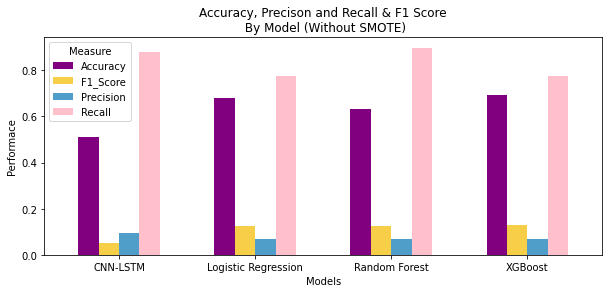

In [56]:
Model_group = Final_df.groupby(["Model","Measure"]).mean()
Model_group = Model_group["Values"]
stack = Model_group.unstack("Measure")
stack.plot.bar(width=0.6,color=["purple","#f7ce48","#4f9dc9","pink"])
plt.title('Accuracy, Precison and Recall & F1 Score\n By Model (Without SMOTE)')
plt.ylabel('Performace')
plt.xlabel('Models')
plt.xticks(rotation = 0)
plt.rcParams['figure.figsize'] = [13, 5]
plt.show()

# 3. Feature importance Using ML Models

In [57]:
from xgboost import plot_importance

models={"XGB":XGBClassifier(random_state = 2,use_label_encoder=False,eval_metric="logloss"),
        "RF":RandomForestClassifier(random_state = 2)}

X = Features.values.astype(float)
y = np.array(Target)

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)


output_df = {"Feature": list(Features.columns)}

for key in models:
    # Split the data into a training set and a test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =1)

    model = models[key]
    # Training the model
    model.fit(X_train, y_train)

    # Computing the importance of each feature
    model_feature_importance = model.feature_importances_
    

    # Normalize model importance
    norm_importance = (model_feature_importance - 
                       np.min(model_feature_importance))/(np.max(model_feature_importance) - 
                                                                  np.min(model_feature_importance))  
    

    output_df[key] = list(norm_importance.round(3))

output_df = pd.DataFrame.from_dict(output_df).sort_values(by=['XGB'],ascending =False).set_index('Feature')
output_df.index.name = ''
print(output_df)

                        XGB     RF
                                  
Fault                 1.000  0.602
BasePolicy            0.922  1.000
AddressChange_Claim   0.203  0.110
Year                  0.162  0.536
PastNumberOfClaims    0.098  0.313
DriverRating          0.097  0.360
Sex                   0.094  0.249
PolicyType            0.072  0.737
AccidentArea          0.067  0.142
MaritalStatus         0.061  0.131
VehiclePrice          0.039  0.282
WeekOfMonthClaimed    0.037  0.250
DayOfWeek             0.035  0.183
WeekOfMonth           0.035  0.237
NumberOfSuppliments   0.027  0.184
AgeOfVehicle          0.024  0.221
WitnessPresent        0.018  0.000
PoliceReportFiled     0.013  0.013
Deductible            0.013  0.089
DayOfWeekClaimed      0.010  0.150
NumberOfCars          0.009  0.032
Age                   0.007  0.194
MonthClaimed          0.007  0.165
Make                  0.006  0.149
RepNumber             0.005  0.163
AgentType             0.002  0.001
Days_Policy_Claim   

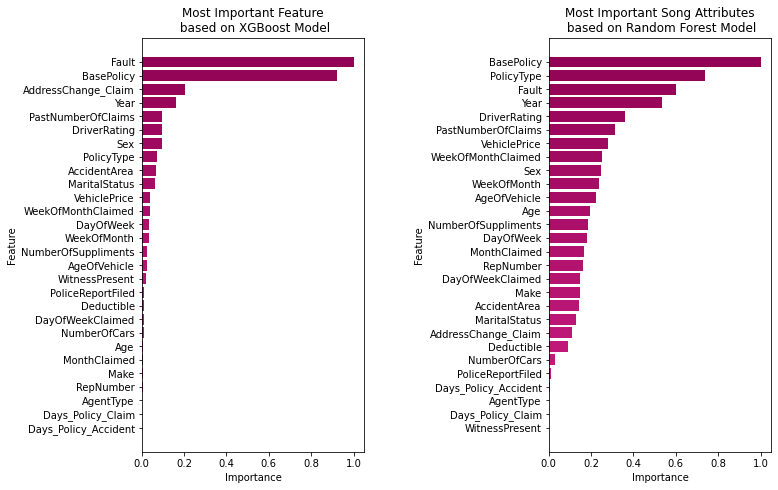

In [58]:
fig, axs = plt.subplots(1,2, figsize=(12,8))

cmap = plt.get_cmap("PiYG")(np.flip(np.arange(30)))

output_df = output_df.sort_values(by="XGB",ascending =True)
axs[0].barh(output_df.index,output_df["XGB"],color=cmap)
axs[0].set_title('Most Important Feature\n based on XGBoost Model')
axs[0].set(ylabel='Feature')
axs[0].set(xlabel='Importance')

output_df = output_df.sort_values(by="RF",ascending =True)
axs[1].barh(output_df.index,output_df["RF"],color=cmap)
axs[1].set_title('Most Important Song Attributes\n based on Random Forest Model')
axs[1].set(ylabel='Feature')
axs[1].set(xlabel='Importance')

fig.tight_layout(pad=5.0)
plt.show()

